In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mean_normalization(X:np):
    N = len(X)
    mini = X.min()
    maxi = X.max()
    avg = X.mean()
    X_nomalize = (X - avg) / (maxi - mini)
    
    # Thêm một cột toàn giá trị 1 vào phía trước của X
    X_b = np.c_[np.ones((N, 1)), X_nomalize]
    return X_b

In [4]:
data_house = pd.read_csv('./advertising.csv')
columns = data_house.columns
print(columns)
data_house = data_house.to_numpy()
print(data_house)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]
 [  8.7  48.9  75.    7.2]
 [ 57.5  32.8  23.5  11.8]
 [120.2  19.6  11.6  13.2]
 [  8.6   2.1   1.    4.8]
 [199.8   2.6  21.2  15.6]
 [ 66.1   5.8  24.2  12.6]
 [214.7  24.    4.   17.4]
 [ 23.8  35.1  65.9   9.2]
 [ 97.5   7.6   7.2  13.7]
 [204.1  32.9  46.   19. ]
 [195.4  47.7  52.9  22.4]
 [ 67.8  36.6 114.   12.5]
 [281.4  39.6  55.8  24.4]
 [ 69.2  20.5  18.3  11.3]
 [147.3  23.9  19.1  14.6]
 [218.4  27.7  53.4  18. ]
 [237.4   5.1  23.5  17.5]
 [ 13.2  15.9  49.6   5.6]
 [228.3  16.9  26.2  20.5]
 [ 62.3  12.6  18.3   9.7]
 [262.9   3.5  19.5  17. ]
 [142.9  29.3  12.6  15. ]
 [240.1  16.7  22.9  20.9]
 [248.8  27.1  22.9  18.9]
 [ 70.6  16.   40.8  10.5]
 [292.9  28.3  43.2  21.4]
 [112.9  17.4  38.6  11.9]
 [ 97.2   1.5  30.   13.2]
 [265.6  20.    0.3  17.4]
 [ 95.7   1.4   7.4  

In [5]:
X_b = mean_normalization(data_house[:, :3])
y = data_house[:,-1]

In [6]:
print(X_b[1])

[ 1.         -0.07575405 -0.09329791 -0.07372976]


## Bài tập 1: linear regression theo phương pháp vectorization :

### Stochastic Gradient Descent

In [7]:
def predict(x_i, thetas):
    y_hat = np.dot(x_i, thetas)
    return y_hat

def compute_loss(y, y_hat):
    return (y - y_hat)**2

def compute_derivative(x, y_hat, y):
    theta_deri = 2 * x * (y_hat  - y)
    return theta_deri

def update_thetas(thetas, theta_deri, lr):
    thetas = thetas - lr*(theta_deri)
    return thetas

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([1.16270837, -0.81960489, 1.39501033,0.29763545])
    print(thetas)
    losses = []
    N = len(X_b)
    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index]
            yi = y[random_index]

            # Compute output
            y_hat = predict(xi, thetas)

            # Compute loss li   
            loss_li = compute_loss(yi, y_hat)

            # Compute gradient for thetas
            thetas_deri = compute_derivative(xi, y_hat, yi)

            # update theta
            thetas = update_thetas(thetas, thetas_deri, learning_rate)

            # logging
            print(loss_li)
            losses.append(loss_li)

    return thetas, losses

[ 1.16270837 -0.81960489  1.39501033  0.29763545]
463.2558680253556
79.40719203303894
104.4719628457468
219.82959915633083
258.9181096005526
21.074299758675686
86.15194250190099
113.37208899245702
3.75601477293913
167.61498500100816
89.65412736772404
200.5313841745371
29.515818203480897
99.45031004477845
225.6858150480261
324.17453869135073
60.396068461977535
376.470146794045
36.79844259504888
83.12785005328303
148.71035567724257
129.92391315009212
0.08292988461643923
198.2259177983868
11.571889708316903
101.09524033557074
65.64482399987678
182.48114449987222
122.69314681097566
10.312641109749977
169.31391411232
16.392020827151068
28.756690911480845
72.12583264244446
13.958893818848146
71.19321935349825
251.17901711254112
36.59786643608504
2.4157100109573797
135.36056274573363
43.95239375202786
51.22263130538868
92.8039588375664
53.14403076630309
0.5586555642185255
31.187654523634517
0.493127865035172
142.64676181183586
70.84016741022734
0.1917516499428217
25.310696665706427
0.00527262

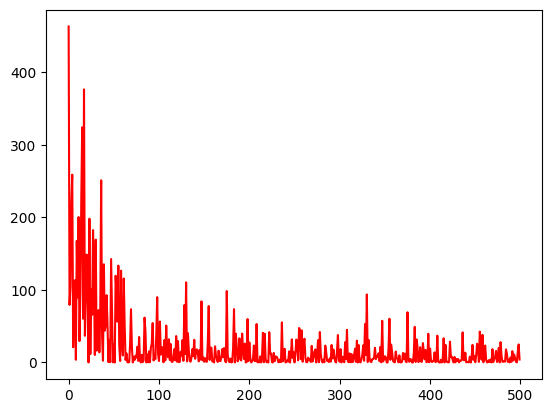

In [8]:
sgd_theta, losses = stochastic_gradient_descent(
    X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [9]:
sgd_theta, losses = stochastic_gradient_descent (X_b, y, n_epochs= 1, learning_rate= 0.01)
print(np.sum(losses))

[ 1.16270837 -0.81960489  1.39501033  0.29763545]
463.2558680253556
79.40719203303894
104.4719628457468
219.82959915633083
258.9181096005526
21.074299758675686
86.15194250190099
113.37208899245702
3.75601477293913
167.61498500100816
89.65412736772404
200.5313841745371
29.515818203480897
99.45031004477845
225.6858150480261
324.17453869135073
60.396068461977535
376.470146794045
36.79844259504888
83.12785005328303
148.71035567724257
129.92391315009212
0.08292988461643923
198.2259177983868
11.571889708316903
101.09524033557074
65.64482399987678
182.48114449987222
122.69314681097566
10.312641109749977
169.31391411232
16.392020827151068
28.756690911480845
72.12583264244446
13.958893818848146
71.19321935349825
251.17901711254112
36.59786643608504
2.4157100109573797
135.36056274573363
43.95239375202786
51.22263130538868
92.8039588375664
53.14403076630309
0.5586555642185255
31.187654523634517
0.493127865035172
142.64676181183586
70.84016741022734
0.1917516499428217
25.310696665706427
0.00527262

### Mini - batch Gradient Descent.

In [10]:
import numpy as np

def predict(x_i, thetas):
    # xi: (N,4) ; thetas:(4,)
    y_hat = np.dot(x_i, thetas)
    # -> (N,)
    return y_hat


def compute_loss(y, y_hat):
    # y_hat : (N,)
    # y : (N,)
    return (y - y_hat) ** 2 # Trung bình của các bình phương sai số


def derivate_loss(y, y_hat):
    # y_hat : (N,)
    # y : (N,)
    return 2 * (y_hat - y)


def derivative_thetas(x: np.ndarray, deriloss: np.ndarray):
    # deriloss shape : (N,)
    # x shape : (N, 4)
    # Reshape deriloss to (N, 1) to match dimensions for matrix multiplication
    N = x.shape[0]
    deriloss = deriloss.reshape(-1, 1)  # Shape (N, 1)
    # Compute gradient: (N, 1) * (N, d) -> (d,)
    theta_deri = np.dot(x.T, deriloss).flatten()  # Shape (d,)
    return theta_deri / N


def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # Thetas : (4, )
    thetas = np.array([1.16270837,
                         -0.81960489,
                         1.39501033,
                         0.29763545])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        shuffled_indices = shuffled_indices = np.array([21, 144, 17, 107, 37, 115, 167, 31, 3,
                                                            132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
                                                            185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
                                                            165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
                                                            169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
                                                            77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
                                                            195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
                                                            92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
                                                            174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
                                                            129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
                                                            168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                                            133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
                                                            154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Iterate through mini-batches
        for i in range(0, len(X_b), minibatch_size):
            # Get mini-batch
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # Compute output
            y_hat = predict(xi, thetas)
            # Compute loss for the mini-batch
            loss = compute_loss(yi, y_hat)
            # Compute derivative of loss
            deri_loss = derivate_loss(yi, y_hat)
            # Compute derivative of parameters
            gradients = derivative_thetas(xi, deri_loss)
            # Update parameters
            thetas = thetas - (learning_rate * gradients)
            thetas_path.append(thetas)

            # Add the mean loss of the mini-batch
            loss_mean = np.mean(loss)
            print(
                f"Epoch {epoch+1}/{n_epochs}, Mini-batch {i//minibatch_size + 1}, Loss: {loss_mean:.4f}")
            losses.append(loss_mean)

    return thetas_path, losses

Epoch 1/50, Mini-batch 1, Loss: 233.2147
Epoch 1/50, Mini-batch 2, Loss: 193.9282
Epoch 1/50, Mini-batch 3, Loss: 220.9753
Epoch 1/50, Mini-batch 4, Loss: 191.4132
Epoch 1/50, Mini-batch 5, Loss: 232.5162
Epoch 1/50, Mini-batch 6, Loss: 233.0991
Epoch 1/50, Mini-batch 7, Loss: 211.4021
Epoch 1/50, Mini-batch 8, Loss: 150.3711
Epoch 1/50, Mini-batch 9, Loss: 173.9393
Epoch 1/50, Mini-batch 10, Loss: 152.7290
Epoch 2/50, Mini-batch 1, Loss: 154.9906
Epoch 2/50, Mini-batch 2, Loss: 126.2194
Epoch 2/50, Mini-batch 3, Loss: 147.5091
Epoch 2/50, Mini-batch 4, Loss: 126.4654
Epoch 2/50, Mini-batch 5, Loss: 160.4630
Epoch 2/50, Mini-batch 6, Loss: 159.9768
Epoch 2/50, Mini-batch 7, Loss: 144.4096
Epoch 2/50, Mini-batch 8, Loss: 98.2505
Epoch 2/50, Mini-batch 9, Loss: 116.0675
Epoch 2/50, Mini-batch 10, Loss: 103.9517
Epoch 3/50, Mini-batch 1, Loss: 105.3343
Epoch 3/50, Mini-batch 2, Loss: 83.8275
Epoch 3/50, Mini-batch 3, Loss: 100.4384
Epoch 3/50, Mini-batch 4, Loss: 85.6012
Epoch 3/50, Mini-

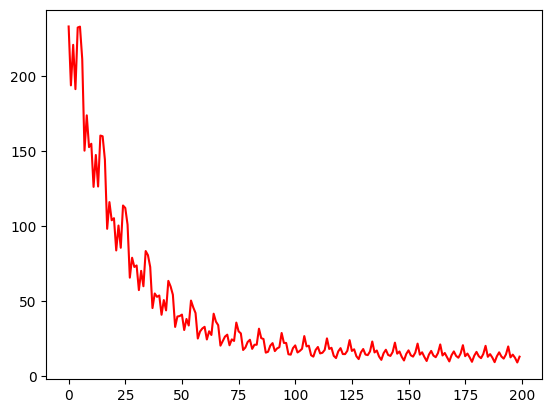

11402.48


In [11]:
data_house = pd.read_csv('./advertising.csv')
data_house = data_house.to_numpy()

X_b = mean_normalization(data_house[:, :3])
y = data_house[:,-1]


mbgd_thetas, losses = mini_batch_gradient_descent(
    X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

print(round(sum(losses), 2))

### batch Gradient Descent

In [12]:
import numpy as np

def predict(x_i, thetas):
    # xi: (N, 4) ; thetas: (4,)
    y_hat = np.dot(x_i, thetas)  # -> (N,)
    return y_hat

def compute_loss(y, y_hat):
    # y_hat: (N,)
    # y: (N,)
    return (y - y_hat) ** 2  # Trung bình của các bình phương sai số

def derivate_loss(y, y_hat):
    # y_hat: (N,)
    # y: (N,)
    return 2 * (y_hat - y)

def derivative_thetas(x: np.ndarray, deriloss: np.ndarray):
    # deriloss shape: (N,)
    # x shape: (N, 4)
    # Reshape deriloss to (N, 1) to match dimensions for matrix multiplication
    N = x.shape[0]
    deriloss = deriloss.reshape(-1, 1)  # Shape (N, 1)
    # Compute gradient: (N, 1) * (N, d) -> (d,)
    theta_deri = np.dot(x.T, deriloss).flatten()  # Shape (d,)
    return theta_deri / N

def batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    # Thetas: (4, )
    thetas = np.array([1.16270837, -0.81960489, 1.39501033, 0.29763545])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Compute output
        y_hat = predict(X_b, thetas)

        # Compute loss for the mini-batch
        loss = compute_loss(y, y_hat)

        # Compute derivative of loss
        deri_loss = derivate_loss(y, y_hat)

        # Compute derivative of parameters
        gradients = derivative_thetas(X_b, deri_loss)

        # Update parameters
        thetas = thetas - (learning_rate * gradients)
        thetas_path.append(thetas)

        # Add the mean loss of the mini-batch
        loss_mean = np.mean(loss)
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss_mean:.4f}")
        losses.append(loss_mean)

    return thetas_path, losses

Epoch 1/100, Loss: 238.0626
Epoch 2/100, Loss: 228.4166
Epoch 3/100, Loss: 219.1942
Epoch 4/100, Loss: 210.3769
Epoch 5/100, Loss: 201.9467
Epoch 6/100, Loss: 193.8866
Epoch 7/100, Loss: 186.1803
Epoch 8/100, Loss: 178.8122
Epoch 9/100, Loss: 171.7673
Epoch 10/100, Loss: 165.0313
Epoch 11/100, Loss: 158.5908
Epoch 12/100, Loss: 152.4325
Epoch 13/100, Loss: 146.5441
Epoch 14/100, Loss: 140.9137
Epoch 15/100, Loss: 135.5298
Epoch 16/100, Loss: 130.3817
Epoch 17/100, Loss: 125.4589
Epoch 18/100, Loss: 120.7514
Epoch 19/100, Loss: 116.2498
Epoch 20/100, Loss: 111.9451
Epoch 21/100, Loss: 107.8284
Epoch 22/100, Loss: 103.8915
Epoch 23/100, Loss: 100.1266
Epoch 24/100, Loss: 96.5259
Epoch 25/100, Loss: 93.0824
Epoch 26/100, Loss: 89.7889
Epoch 27/100, Loss: 86.6390
Epoch 28/100, Loss: 83.6263
Epoch 29/100, Loss: 80.7447
Epoch 30/100, Loss: 77.9884
Epoch 31/100, Loss: 75.3520
Epoch 32/100, Loss: 72.8302
Epoch 33/100, Loss: 70.4178
Epoch 34/100, Loss: 68.1101
Epoch 35/100, Loss: 65.9025
Epoch 

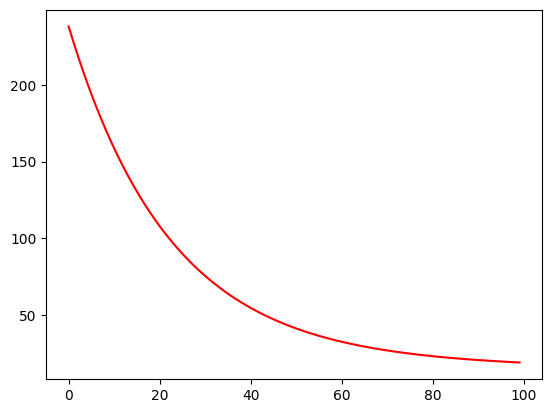

In [13]:
bgd_thetas , losses = batch_gradient_descent (X_b, y, n_epochs =100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color ="r")
plt.show()

In [14]:
print (round(sum(losses), 2))

6716.46
